# Business Data Analysis

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import excel data

df = pd.read_excel("../DATA/Asset_sales_data.xlsx")

df.head()

,date,products,sales
0,11-20-2021,cars,19234
1,12-12-2021,boats,87598
2,11-07-2021,cars,15900
3,12-06-2021,boats,12087
4,12-09-2021,cars,56897


In [3]:
# Datatype of columns

df.dtypes

date        object
products    object
sales        int64
dtype: object

In [4]:
# OR
print(df.dtypes)

date        object
products    object
sales        int64
dtype: object


In [5]:
# Convert date to datetime

df['date'] = pd.to_datetime(df['date'])

df.dtypes

date        datetime64[ns]
products            object
sales                int64
dtype: object

In [6]:
# Get month for each row

df["month"] = pd.to_datetime(df['date']).dt.month
df.head()

,date,products,sales,month
0,2021-11-20,cars,19234,11
1,2021-12-12,boats,87598,12
2,2021-11-07,cars,15900,11
3,2021-12-06,boats,12087,12
4,2021-12-09,cars,56897,12


In [7]:
# Group data by month

by_month = df.groupby(by='month').sum(numeric_only=True).idxmax()
by_month

sales    12
dtype: int32

In [8]:
# Values between 11-20-2021 and 12-06-2021

df2 = df.loc[(df['date'] >= "11-20-2021") & (df['date'] <= "12-06-2021")]
df2.head()

,date,products,sales,month
0,2021-11-20,cars,19234,11
3,2021-12-06,boats,12087,12
5,2021-12-06,houses,19345,12
6,2021-11-20,cars,19234,11
8,2021-12-06,houses,20989,12


In [9]:
# Total sales for the period
total_sales = df2['sales'].sum()
print(f"The total sales for the period is ${total_sales}")

The total sales for the period is $159431


In [10]:
# Group by product
by_product = df.groupby(by='products')['sales'].sum()
by_product

products
boats     301955
cars      290427
houses     85042
Name: sales, dtype: int64

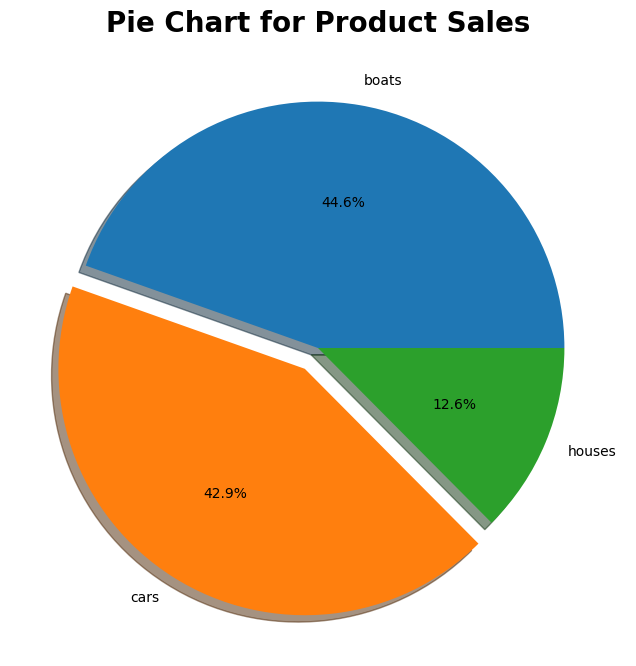

In [11]:
# Pie chart for each product
explode =  (0, 0.1, 0)

fig,ax = plt.subplots(figsize=(12,8))
ax.pie(by_product, labels=by_product.index,
       explode=explode, autopct='%1.1f%%',
       shadow=True
        )
plt.title(label="Pie Chart for Product Sales",
          fontdict={'fontsize':20,
                    'fontweight':'bold'}
          )
plt.show()

In [12]:
# Pivot table and sum of product sales

product_sales = df.pivot_table(values='sales',
                               index='products',
                               aggfunc='sum')
product_sales

,sales
products,
boats,301955
cars,290427
houses,85042


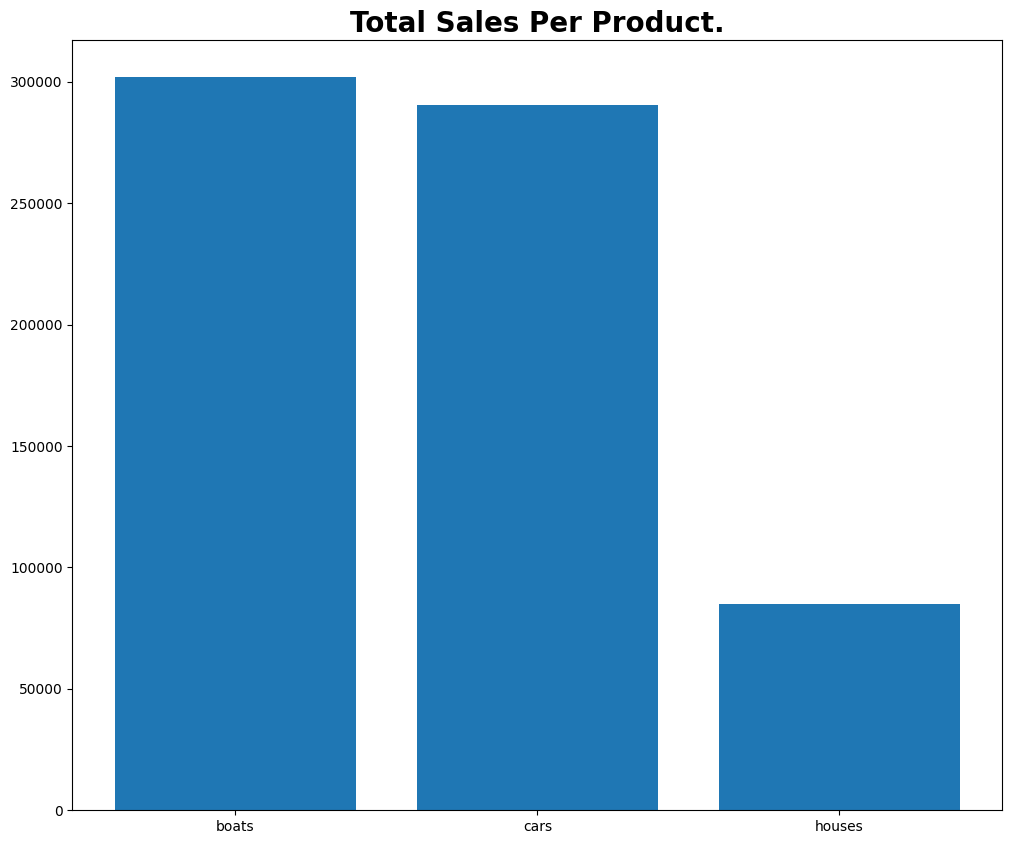

In [13]:
# Barplot of product sales

fig,ax = plt.subplots(figsize=(12,10))
ax.bar(x=product_sales.index,
       height=product_sales['sales']
        )
plt.title(label="Total Sales Per Product.",
        fontdict={'fontsize':20,
                  'fontweight':'bold'})
plt.show()